Теоретические значения СКО, полученные с помощью функции D():

σ_φ1 =  0.6066245350815808
σ_φ2 =  0.36302563863521997
σ_φ3 =  0.204486036233857


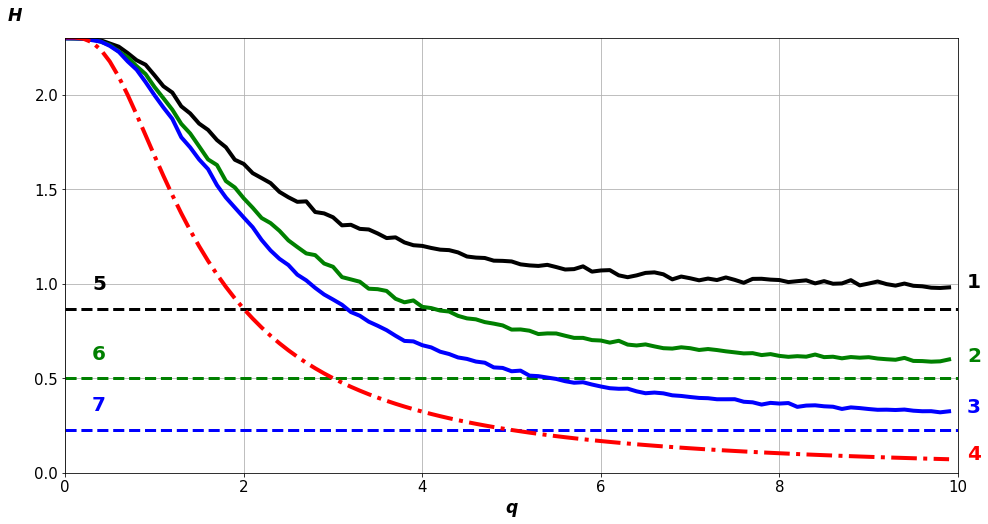

In [2]:
# рис. 5  
import numpy as np
import math #для ln()
import matplotlib.pyplot as plt
from numpy import sqrt, pi, exp
import scipy.special as sc # для гипергеометрической функции Mhyper
import random
from numpy import linalg # для собственные значения матрицы

def D(q):
    a=150
    
    b=pi**2/3
    c=4*pi
    d=0
    for n in range(1,a+1):
        e=1/n**2
        Gamma = math.gamma(1 + n/2)
        f=(-1*q)**n
        Mhyper=sc.hyp1f1(n/2, n+1, -q**2/2)         
        m=pow(2**n, 0.5)
        g=pi*m*math.factorial(n)
        d=d + e*Gamma*f* Mhyper/g
    return b+c*d

# СКО:
q1=2; q2=3; q3=5
sigma1= sqrt(D(q1)) ; sigma2= sqrt(D(q2)); sigma3=sqrt(D(q3)) ;
print("Теоретические значения СКО, полученные с помощью функции D():\n")
print("σ_φ1 = ", sigma1)
print("σ_φ2 = ", sigma2)
print("σ_φ3 = ", sigma3)

M=100 #кол-во усреднений для оценки КМ-цы
N=10 #длина выборки (число компонент сигнала)
f=0 #частота сигнала

#возвращает Массив случайных комплексных чисел <class 'numpy.ndarray'>
def rnorm(N,mu,sigma):
    arr = np.array([])
    for i in range(N):
        a=random.gauss(mu, sigma)
        b=random.gauss(mu, sigma)
        arr = np.append(arr , complex(a,b))
    return arr
#возвращает Массив случайных действительных чисел <class 'numpy.ndarray'>
def rnorm_1(N,mu,sigma):
    arr = np.array([])
    for i in range(N):
        a=random.gauss(mu, sigma)
        arr = np.append(arr , a)
    return arr

# Энтропия: детерминированный сигнал со случайной фазой + собственный шум
# sigma - это СКО фазы
def H1(A,f, sigma):
    R = np.zeros((M*N,N,N),dtype=np.complex128) # Корреляционная матрица пришедшего сигнала
    for i in range(N*M):
        S0 = np.array([])
        Noise =  rnorm(N,0,1)
        fi0 = rnorm_1(N,0, sigma)
        for k in range(N):
            S0 = np.append(S0 , Noise[k]+A*exp(1j*(2*math.pi*f*k/N + fi0[k])))
        #транспонированная матрица
        S=np.array([S0]).T
        #комплексно-сопряженная матрица
        S_h= np.conj(S0)
        R[i]=S*S_h 
    RRR  = np.zeros((N,N),dtype=np.complex128)
    for i in range(N*M):
        RRR=RRR+R[i]
    RRR  = RRR/(N*M)
    #собственные значения матрицы RRR
    L=linalg.eig(RRR)[0] 
    EV=L
    sum_EV=0
    for i in range(N): sum_EV+=abs(EV[i])
    AN=EV/sum_EV
    E=0
    for i in range(N): E+= - abs(AN[i])*math.log(abs(AN[i]))
    return E

# Энтропия: детерминированный сигнал без фазовых флуктуаций + собственный шум
def H2(q,N):
    return(math.log(q**2 *N + N) - (q**2*N+1)*math.log(q**2*N+1)/(q**2 *N + N))


def H1_gr(A,f, fi):
    gr=[]
    for i in range(len(A)): 
        gr.append(H1(A[i], f, fi))
    return gr

def H2_gr(q,N):
    gr=[]
    for i in range(len(q)): 
        gr.append(H2(q[i],N))
    return gr

A = np.arange(0,10,0.1)
qs=[q1, q2, q3]
labels=['1', '2','3','5','6', '7']
colors=['black', 'g', 'b']

# sigmas = [sigma1, sigma2, sigma3]  # эти значения получены с помощью функции D, они справедливы при  q -> oo ? - не подходят
sigmas = [1.5/3, 1/3, 0.6/3] # [0.5, 0.33, 0.2] определены по графику из рис. 4 - подходят!!!

fig, ax = plt.subplots()

for i in range(len(sigmas)):
    gr=H1_gr(A,f, sigmas[i])
    ax.plot(A, gr,colors[i], label=labels[i], linewidth=4 )
    plt.axis([0,10,0,2.3])
    xmin, xmax, ymin, ymax = plt.axis()
    plt.text(xmax+0.1, min(gr), labels[i], color =colors[i] , fontsize = 20, fontweight='bold')
    yy=H2(qs[i],N)
    plt.hlines(y=yy, xmin=xmin, xmax=xmax, colors = colors[i], linestyles='dashed', linewidths=3)
    plt.text(xmin+0.3, yy+0.1, labels[i+3], color =colors[i] , fontsize = 20, fontweight='bold')
        
gr=H2_gr(A,N)
ax.plot(A, gr,'red', linestyle = '-.', label='4', linewidth=4)
plt.axis([0, 10, 0, 2.3])
xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmax+0.1, min(gr), '4', color ='red' , fontsize = 20, fontweight='bold')

plt.xlabel('q', color='black',fontsize = 'xx-large', style = 'italic', weight=600, loc='center')
plt.ylabel('H', color='black',fontsize = 'xx-large',style = 'italic', weight=600 , rotation=0, y=1.03, labelpad=20)

plt.tick_params(labelsize = 15)
#plt.legend(loc = 'upper right', fontsize = 15)
plt.rcParams["figure.figsize"] = (16, 8) 
plt.grid(True)
plt.show()

In [ ]:
# Здесь нужно понимать как получились значения СКО при заданном значении ОСШ q  на рис.4 
# Это непонятно 